# Data visualisation

### Libraries

In [35]:
import TFIDF
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Histogram


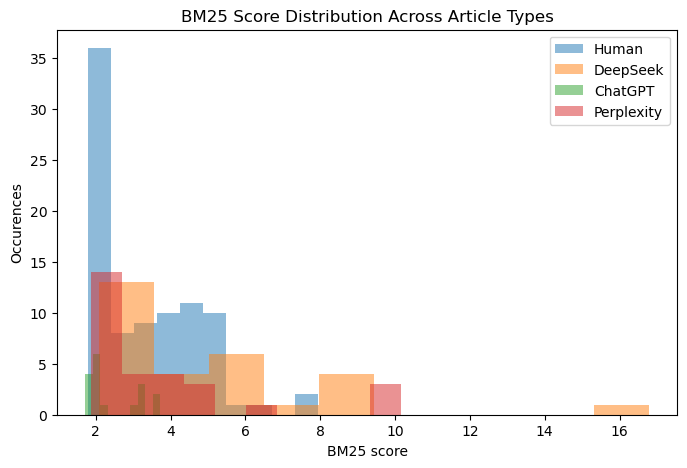

In [60]:
plt.figure(figsize=(8, 5))


nonzeroHuman = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.5]
nonzeroDeepSeek = TFIDF.scoresDeepSeekArticles[TFIDF.scoresDeepSeekArticles > 0.5]
nonzeroChatGPT = TFIDF.scoresChatGPTArticles[TFIDF.scoresChatGPTArticles > 0.5]
nonzeroPerplexity = TFIDF.scoresPerplexityArticles[TFIDF.scoresPerplexityArticles > 0.5]

plt.hist(nonzeroHuman, bins=10, alpha=0.5, label="Human")
plt.hist(nonzeroDeepSeek, bins=10, alpha=0.5, label="DeepSeek")
plt.hist(nonzeroChatGPT, bins=10, alpha=0.5, label="ChatGPT")
plt.hist(nonzeroPerplexity, bins=10, alpha=0.5, label="Perplexity")
plt.xlabel("BM25 score")
plt.ylabel("Occurences")
plt.title("BM25 Score Distribution Across Article Types")
plt.legend()
plt.show()



### Boxplot


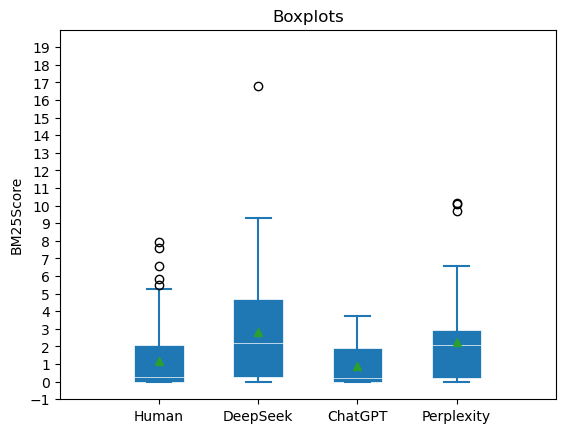

In [ ]:
fig, ax = plt.subplots()

positions = [2,4,6,8]

VP = ax.boxplot([TFIDF.scoresHumanArticles, TFIDF.scoresDeepSeekArticles, TFIDF.scoresChatGPTArticles, TFIDF.scoresPerplexityArticles], positions = positions , widths=1, patch_artist=True, 
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 10), xticks=np.arange(1, 10),
       ylim=(-1, 20), yticks=np.arange(-1, 20))

labels = ['Human', 'DeepSeek', 'ChatGPT', 'Perplexity']

ax.set_xticks(positions)
ax.set_xticklabels(labels)

ax.set_title('Boxplots')
plt.ylabel("BM25Score")

plt.show()

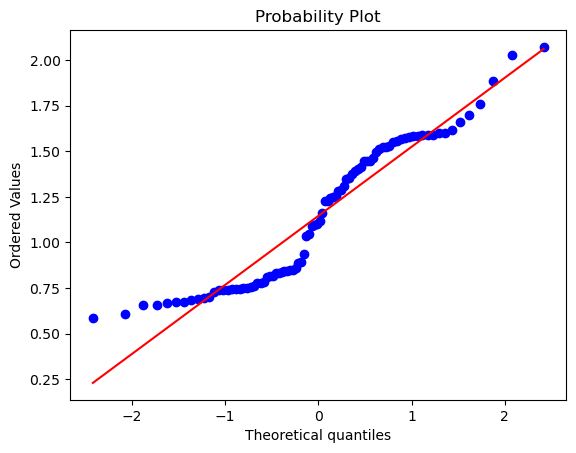

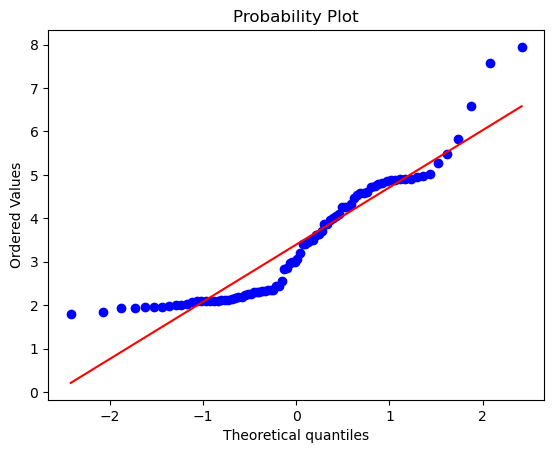

np.float64(0.4007220216606498)

In [58]:
nonzero = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.5]
stats.probplot(np.log(nonzero), dist="norm", plot=plt)
plt.show()

nonzero = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.5]
stats.probplot(nonzero, dist="norm", plot=plt)
plt.show()

zeros = np.sum(TFIDF.scoresHumanArticles == 0)
zero_fraction = zeros / len(TFIDF.scoresHumanArticles)
zero_fraction



# Statistik
